1.引入程序中依赖的包。

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

2.加载数据，并浏览数据集。我们使用pandas.read_csv加载数据，大家可以学习一下DataFrame的相关操作。  
如果下载失败，可能是网络原因，你可以手动下载数据，将URL替换为本地路径即可。

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/qikunlun/ML-course/master/data/testSet-LR.csv', header=None)
print(df.head())

          0          1  2
0 -0.017612  14.053064  0
1 -1.395634   4.662541  1
2 -0.752157   6.538620  0
3 -1.322371   7.152853  0
4  0.423363  11.054677  0


3.准备特征数据集和预测标签。本例采用前两列做为样本特征，最后一列做为类别标签。

In [19]:
train_X = df.iloc[:, [0, 1]].values
train_y = df.iloc[:, [2]].values.ravel()
logistic = LogisticRegression()
logistic.fit(train_X, train_y)
print('The training accuracy is %.2f'% logistic.score(train_X, train_y))

The training accuracy is 0.96


4.画出LogisticRegress的分类结果，以及最终的回归分类决策线。

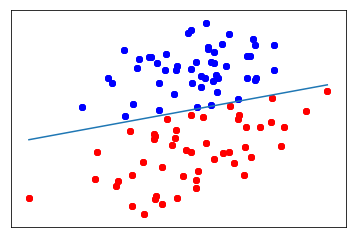

In [48]:
label = logistic.predict(train_X)
plt.scatter(train_X[label==0, 0],train_X[label==0, 1], color='blue')
plt.scatter(train_X[label==1, 0],train_X[label==1, 1], color='red')

minx, maxx = np.min(train_X[:, 0]), np.max(train_X[:, 0])
# 求解决策网线的斜率和截距
k, b = -logistic.coef_[0,0]/logistic.coef_[0,1], -logistic.intercept_/logistic.coef_[0,1]
plt.plot((minx, maxx), (minx*k+b, maxx*k+b))
plt.xticks(())
plt.yticks(())
plt.show()